**PREDICTING STOCK MARKET TRENDS USING BUSINESS INTELLIGENCE AND ANALYTICS:
A case study using FTSE 100**

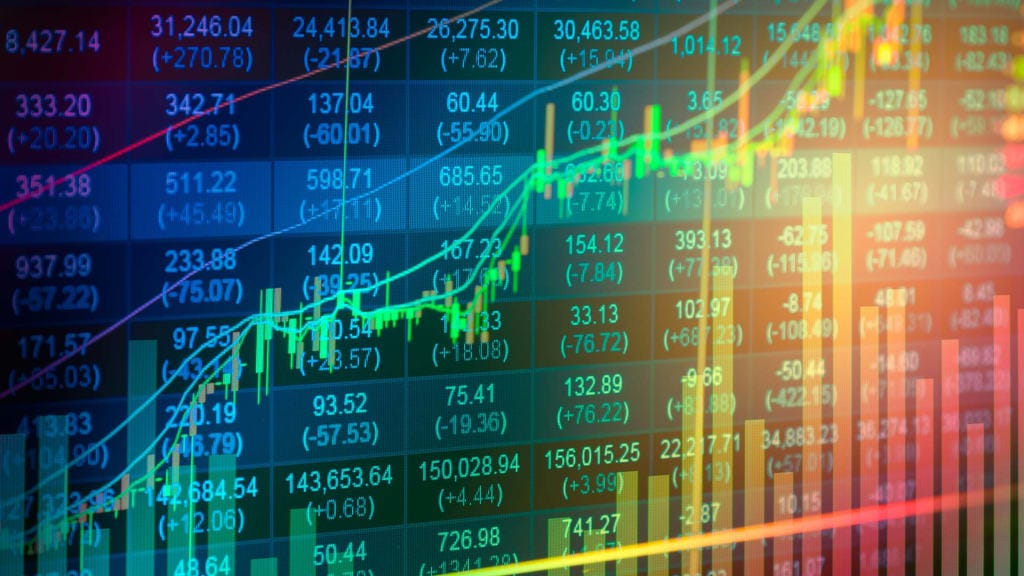


In [ ]:
import pandas as pd
import numpy as np
import time

Query Dataset from Yahoo Finance

In [ ]:
# stock companies in the FTSE 100 index
tickers = ['BHP.L',
'AZN.L',
'SHEL.L',
'HSBA.L',
'ULVR.L',
'RIO.L',
'BP.L',
'DGE.L',
'BATS.L',
'GSK.L',
'GLEN.L',
'REL.L',
'AAL.L',
'LSEG.L',
'NG.L',
'CPG.L',
'PRU.L',
'LLOY.L',
'BA.L',
'NWG.L',
'EXPN.L',
'BARC.L',
'CRH.L',
'VOD.L',
'FERG.L',
'AHT.L',
'FLTR.L',
'STAN.L',
'IMB.L',
'SSE.L',
'TSCO.L',
'ANTO.L',
'LGEN.L',
'ABF.L',
'III.L',
'RTO.L',
'AV.L',
'BT-A.L',
'SMT.L',
'SN.L',
'SGRO.L',
'BNZL.L',
'WPP.L',
'CRDA.L',
'INF.L',
'IHG.L',
'RR.L',
'SKG.L',
'NXT.L',
'BRBY.L',
'ENT.L',
'HLMA.L',
'SPX.L',
'SGE.L',
'SDR.L',
'CCH.L',
'JD.L',
'MNDI.L',
'UU.L',
'SVT.L',
'IAG.L',
'ITRK.L',
'FRES.L',
'ADM.L',
'PSON.L',
'PHNX.L',
'STJ.L',
'OCDO.L',
'SMIN.L',
'MRO.L',
'SBRY.L',
'WTB.L',
'PSH.L',
'AUTO.L',
'KGF.L',
'LAND.L',
'SMDS.L',
'MNG.L',
'BME.L',
'RMV.L',
'BKG.L',
'BDEV.L',
'DCC.L',
'PSN.L',
'HL.L',
'JET.L',
'JMAT.L',
'TW.L',
'BLND.L',
'HIK.L',
'ICP.L',
'PNN.L',
'POLY.L',
'RSAB.L',
'EVR.L',
'AAF.L',
'RS1.L',
'WEIR.L',
'UTG.L',
'FRAS.L'
]

In [ ]:
dataset = {}

In [ ]:
for ticker in tickers:
    data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1=1356998400&period2=1675123200&interval=1d&events=history&includeAdjustedClose=true')
    data['ticker'] = ticker
    dataset[ticker] = data
    time.sleep(1)

In [ ]:
stock_data = pd.concat(dataset)

In [ ]:
stock_data

Date    Open      High         Low   Close    Adj Close  \
BHP.L  0     2013-01-02  2167.0  2225.625  2167.00000  2208.5  1154.137329   
       1     2013-01-03  2202.0  2207.500  2174.50000  2199.5  1149.433960   
       2     2013-01-04  2192.5  2194.000  2166.50000  2182.5  1140.550293   
       3     2013-01-07  2176.5  2189.500  2161.50000  2169.0  1133.495239   
       4     2013-01-08  2156.0  2165.500  2141.00000  2149.0  1123.043457   
...                 ...     ...       ...         ...     ...          ...   
FRAS.L 2542  2023-01-24   780.5   780.500   759.50000   761.0   761.000000   
       2543  2023-01-25   766.0   771.000   751.33197   755.0   755.000000   
       2544  2023-01-26   762.0   769.000   759.00000   759.0   759.000000   
       2545  2023-01-27   774.0   774.000   756.37500   771.0   771.000000   
       2546  2023-01-30   765.5   781.500   750.50000   780.0   780.000000   

                Volume  ticker  
BHP.L  0     5041549.0   BHP.L  
       1     5184662.0   BHP.L  
       2     4462625.0   BHP.L  
       3     4815189.0   BHP.L  
       4     4733869.0   BHP.L  
...                ...     ...  
FRAS.L 2542   198989.0  FRAS.L  
       2543   232767.0  FRAS.L  
       2544   722703.0  FRAS.L  
       2545   200493.0  FRAS.L  
       2546   344983.0  FRAS.L  

[248320 rows x 8 columns]

In [ ]:
stock_data = stock_data.reset_index(drop = True)
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2013-01-02,2167.0,2225.625,2167.0,2208.5,1154.137329,5041549.0,BHP.L
1,2013-01-03,2202.0,2207.500,2174.5,2199.5,1149.433960,5184662.0,BHP.L
2,2013-01-04,2192.5,2194.000,2166.5,2182.5,1140.550293,4462625.0,BHP.L
3,2013-01-07,2176.5,2189.500,2161.5,2169.0,1133.495239,4815189.0,BHP.L
4,2013-01-08,2156.0,2165.500,2141.0,2149.0,1123.043457,4733869.0,BHP.L


In [ ]:
stock_data.to_csv('FTSE-100-data.csv', index = False, encoding= 'utf8')

In [ ]:
stock_data['ticker'].nunique()

100

In [ ]:
stock_data.shape

(248320, 8)

# **Load Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Import the another model here (Random forest) module
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
ftse_100_data = stock_data.copy()

In [ ]:
ftse_100_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2013-01-02,2167.0,2225.625,2167.0,2208.5,1154.137329,5041549.0,BHP.L
1,2013-01-03,2202.0,2207.500,2174.5,2199.5,1149.433960,5184662.0,BHP.L
2,2013-01-04,2192.5,2194.000,2166.5,2182.5,1140.550293,4462625.0,BHP.L
3,2013-01-07,2176.5,2189.500,2161.5,2169.0,1133.494873,4815189.0,BHP.L
4,2013-01-08,2156.0,2165.500,2141.0,2149.0,1123.043335,4733869.0,BHP.L


In [ ]:
ftse_100_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
248315,2023-01-24,780.5,780.5,759.50000,761.0,761.0,198989.0,FRAS.L
248316,2023-01-25,766.0,771.0,751.33197,755.0,755.0,232767.0,FRAS.L
248317,2023-01-26,762.0,769.0,759.00000,759.0,759.0,722703.0,FRAS.L
248318,2023-01-27,774.0,774.0,756.37500,771.0,771.0,200493.0,FRAS.L
248319,2023-01-30,765.5,781.5,750.50000,780.0,780.0,344983.0,FRAS.L


#Basic EDA

In [ ]:
def data_info(data):
    '''
    This function basically helps to get basic information about the data set
    It should give information on the number of rows, columns, data points and tell us which
    features are numerical or categorical
    '''
    print('1) Number of columns are: ',data.shape[1])
    print('2) Number of rows are: ',data.shape[0])
    print('3) Total number of data-points:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features:',len(cat_features))

In [ ]:
data_info(ftse_100_data)

1) Number of columns are:  8
2) Number of rows are:  248320
3) Total number of data-points: 1986560
4) Count of Numerical Features: 6
5) Count of Categorical Features: 2


In [ ]:
#inspecting data type of variables in the data set
print("Breakdown of variables into data types \n")
print(ftse_100_data.info())

Breakdown of variables into data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248320 entries, 0 to 248319
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       248320 non-null  object 
 1   Open       248257 non-null  float64
 2   High       248257 non-null  float64
 3   Low        248257 non-null  float64
 4   Close      248257 non-null  float64
 5   Adj Close  248257 non-null  float64
 6   Volume     248257 non-null  float64
 7   ticker     248320 non-null  object 
dtypes: float64(6), object(2)
memory usage: 15.2+ MB
None


#Checking for missing values

In [ ]:
def check_features_with_missing_values(data):
    '''
    This function helps to check features in our data set that has missing value. The basic functionality
    is to provide more context into the following:

    1. Overall calculation of missing values in the data set
    2. Breakdown of features with missing values, the total missing value and the percentage of
       missing values in that column.
    '''
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Overall Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        col_miss = round(data[i].isnull().sum()/len(data[i]) * 100, 2)
        if data[i].isna().sum() > 0:
            print('The Feature',i,'has a total of '+ str(data[i].isna().sum()) + ' missing values which translates to ' +
                 str(col_miss) + '% of values missing in that column')

In [ ]:
check_features_with_missing_values(ftse_100_data)

Percentage of Overall Missing Values is  0.02 %
Missing Value Estimation :
The Feature Open has a total of 63 missing values which translates to 0.03% of values missing in that column
The Feature High has a total of 63 missing values which translates to 0.03% of values missing in that column
The Feature Low has a total of 63 missing values which translates to 0.03% of values missing in that column
The Feature Close has a total of 63 missing values which translates to 0.03% of values missing in that column
The Feature Adj Close has a total of 63 missing values which translates to 0.03% of values missing in that column
The Feature Volume has a total of 63 missing values which translates to 0.03% of values missing in that column


#Descriptive statistics and distribution plots for numerical variables

In [ ]:
num_features = [col for col in data.columns if (data[col].dtype != 'O')]
num_features

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [ ]:
def descriptive_stat(data,grp):
    '''
    This function give the five number summary statistics of variables with numerical data type. It takes the data as
    input and output the five number statistics as output. An optional variable is it takes in the group of variables you
    might be interested in.
    '''
    subset = data[grp].describe().T
    return subset

In [ ]:
def dist_plot(data,grp):
    '''
    This function plot the distribution of variables with numerical data type. It takes the data as
    input and output the distribution plot. An optional variable is it takes in the group of variables you
    might be interested in.
    '''
    plot = data[grp].hist(layout = (4,3), figsize=(24, 24))
    return plot

In [ ]:
descriptive_stat(ftse_100_data, num_features)

,count,mean,std,min,25%,50%,75%,max
Open,248257.0,1.650476e+03,1.864043e+03,0.81,440.600006,1.033499e+03,2.142000e+03,1.713000e+04
High,248257.0,1.669332e+03,1.885711e+03,0.81,445.873993,1.045666e+03,2.167000e+03,1.968080e+04
Low,248257.0,1.631182e+03,1.842151e+03,0.81,435.029999,1.021000e+03,2.117000e+03,1.689500e+04
Close,248257.0,1.650353e+03,1.863915e+03,0.81,440.640015,1.033000e+03,2.143000e+03,1.713500e+04
Adj Close,248257.0,1.409976e+03,1.741117e+03,0.81,333.918793,8.247750e+02,1.780070e+03,1.691500e+04
Volume,248257.0,8.101866e+06,2.473198e+07,0.00,756293.000000,2.059381e+06,5.470279e+06,8.361669e+08


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

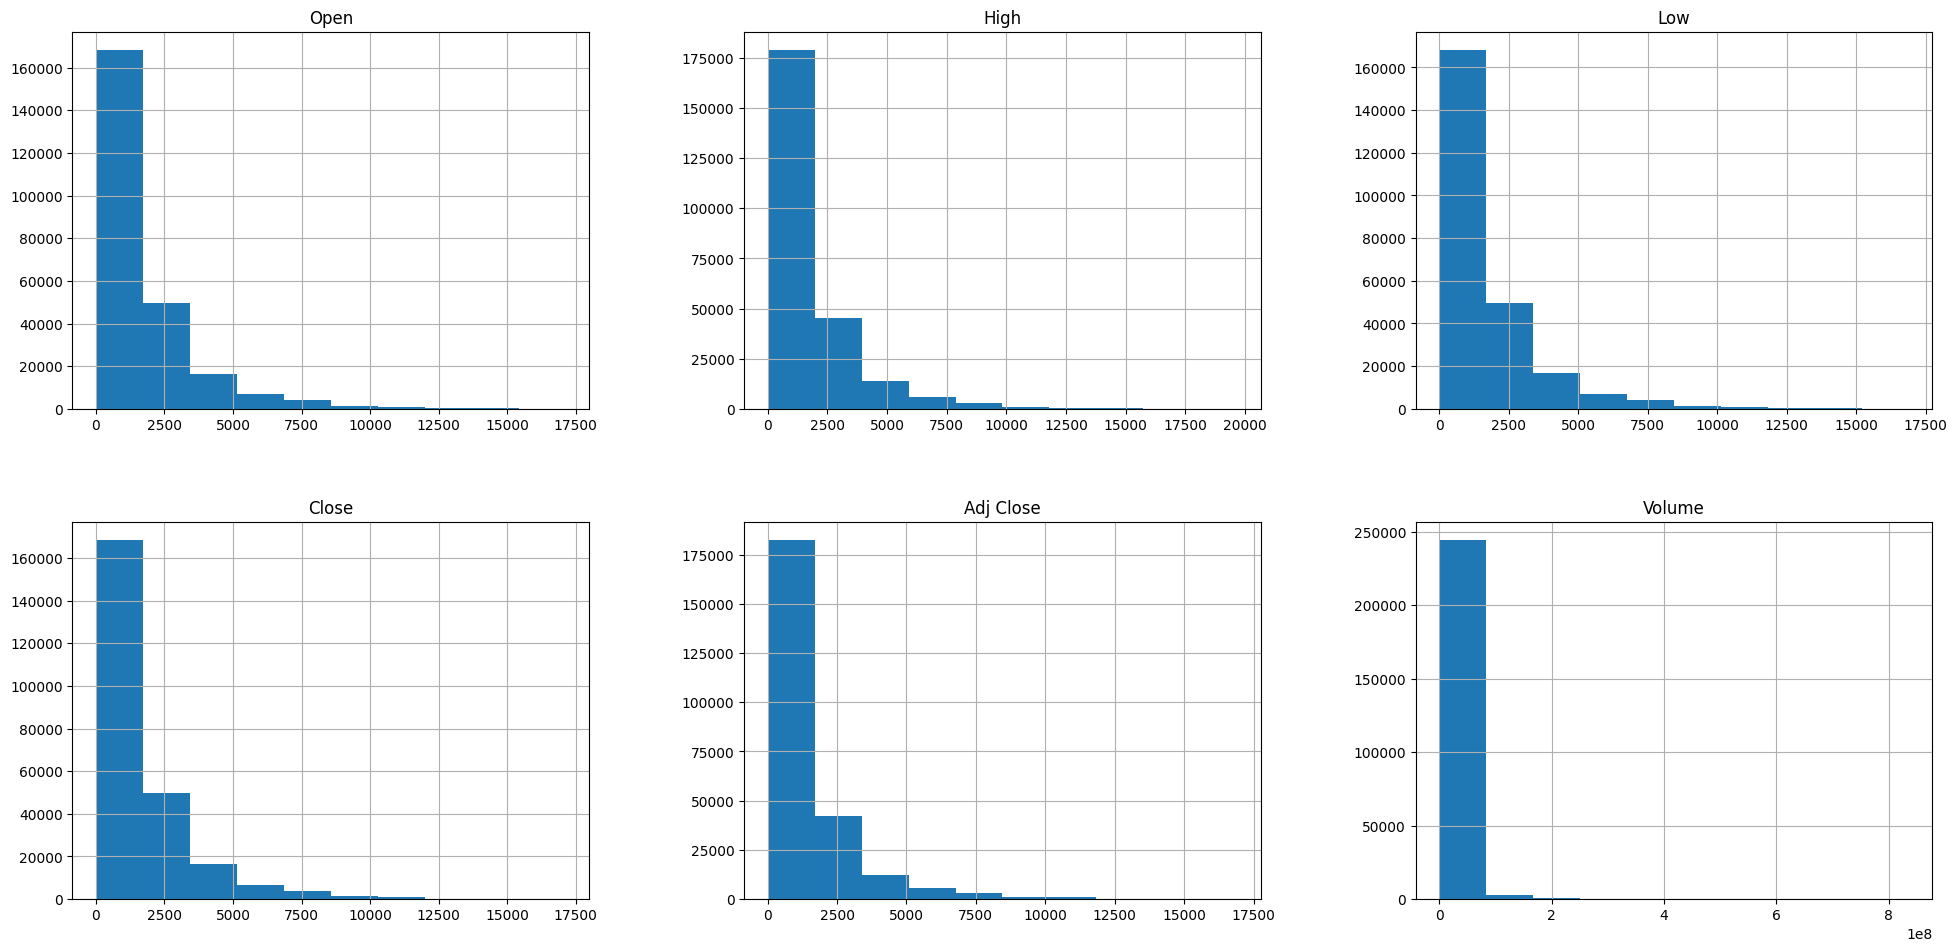

In [ ]:
dist_plot(ftse_100_data, num_features)

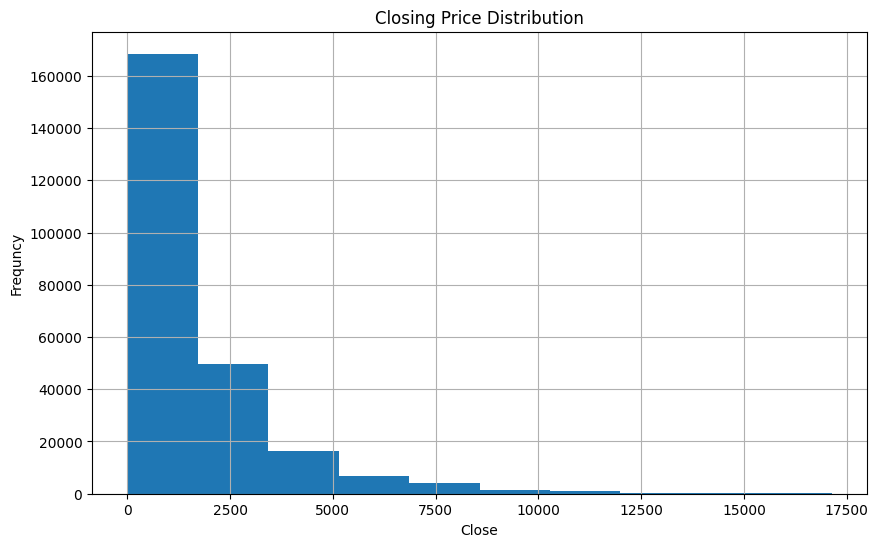

In [ ]:
grp = ftse_100_data['Close'].hist(figsize=(10, 6))
grp = plt.ylabel('Frequncy')
grp = plt.xlabel('Close')
grp = plt.title('Closing Price Distribution')


The average price for the opening, high, low, close, and adjusted close ranges from 1,400 to 1,700. All prices start at a minimum of 0.81. All categories have a median price that ranges from 820 to 1100. The distribution is skewed to the right because the median price is closer to the prices in the first quartile. The distribution figure above shows the skewed distribution of the variables. Because the distributions of all the variables are skewed to the right, more values are near the median values.

#Data Preprocessing

In [ ]:
#checking for duplicates
ftse_100_data.duplicated().unique()

array([False])

In [ ]:
ftse_100_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'ticker'],
      dtype='object')

In [ ]:
#convert timestamp variable to datetime
ftse_100_data['Date'] = pd.to_datetime(ftse_100_data['Date'])

In [ ]:
ftse_100_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248320 entries, 0 to 248319
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       248320 non-null  datetime64[ns]
 1   Open       248257 non-null  float64       
 2   High       248257 non-null  float64       
 3   Low        248257 non-null  float64       
 4   Close      248257 non-null  float64       
 5   Adj Close  248257 non-null  float64       
 6   Volume     248257 non-null  float64       
 7   ticker     248320 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 15.2+ MB


#Filling Missing Values

In [ ]:
preprocessed_data = ftse_100_data.copy()

In [ ]:
preprocessed_data['Open'] = preprocessed_data['Open'].fillna(preprocessed_data['Open'].mean())
preprocessed_data['High'] = preprocessed_data['High'].fillna(preprocessed_data['High'].mean())
preprocessed_data['Low'] = preprocessed_data['Low'].fillna(preprocessed_data['Low'].mean())
preprocessed_data['Close'] = preprocessed_data['Close'].fillna(preprocessed_data['Close'].mean())
preprocessed_data['Adj Close'] = preprocessed_data['Adj Close'].fillna(preprocessed_data['Adj Close'].mean())
preprocessed_data['Volume'] = preprocessed_data['Volume'].fillna(preprocessed_data['Volume'].mean())

In [ ]:
descriptive_stat(preprocessed_data, num_features)

,count,mean,std,min,25%,50%,75%,max
Open,248320.0,1.650476e+03,1.863807e+03,0.81,440.700012,1.034000e+03,2.141500e+03,1.713000e+04
High,248320.0,1.669332e+03,1.885472e+03,0.81,445.992836,1.046000e+03,2.166000e+03,1.968080e+04
Low,248320.0,1.631182e+03,1.841918e+03,0.81,435.166496,1.021108e+03,2.116000e+03,1.689500e+04
Close,248320.0,1.650353e+03,1.863678e+03,0.81,440.780151,1.034000e+03,2.142000e+03,1.713500e+04
Adj Close,248320.0,1.409976e+03,1.740896e+03,0.81,334.021195,8.251213e+02,1.779793e+03,1.691500e+04
Volume,248320.0,8.101866e+06,2.472884e+07,0.00,756493.500000,2.060104e+06,5.475368e+06,8.361669e+08


In [ ]:
descriptive_stat(ftse_100_data, num_features)

,count,mean,std,min,25%,50%,75%,max
Open,248257.0,1.650476e+03,1.864043e+03,0.81,440.600006,1.033499e+03,2.142000e+03,1.713000e+04
High,248257.0,1.669332e+03,1.885711e+03,0.81,445.873993,1.045666e+03,2.167000e+03,1.968080e+04
Low,248257.0,1.631182e+03,1.842151e+03,0.81,435.029999,1.021000e+03,2.117000e+03,1.689500e+04
Close,248257.0,1.650353e+03,1.863915e+03,0.81,440.640015,1.033000e+03,2.143000e+03,1.713500e+04
Adj Close,248257.0,1.409976e+03,1.741117e+03,0.81,333.918793,8.247750e+02,1.780070e+03,1.691500e+04
Volume,248257.0,8.101866e+06,2.473198e+07,0.00,756293.000000,2.059381e+06,5.470279e+06,8.361669e+08


In [ ]:
check_features_with_missing_values(preprocessed_data)

Percentage of Overall Missing Values is  0.0 %
Missing Value Estimation :


# What are the factors that influence the daily closing price of the FTSE100 index?  
A correlation Analysis was first performed to gauge the relationship before analysing the relationship between each variable and the daily closing price.

In [ ]:
corr = preprocessed_data.corrwith(preprocessed_data["Close"]).sort_values(ascending=True)

In [ ]:
corr = corr.iloc[:4]
corr

Volume      -0.200254
Adj Close    0.990179
Open         0.999779
Low          0.999796
dtype: float64

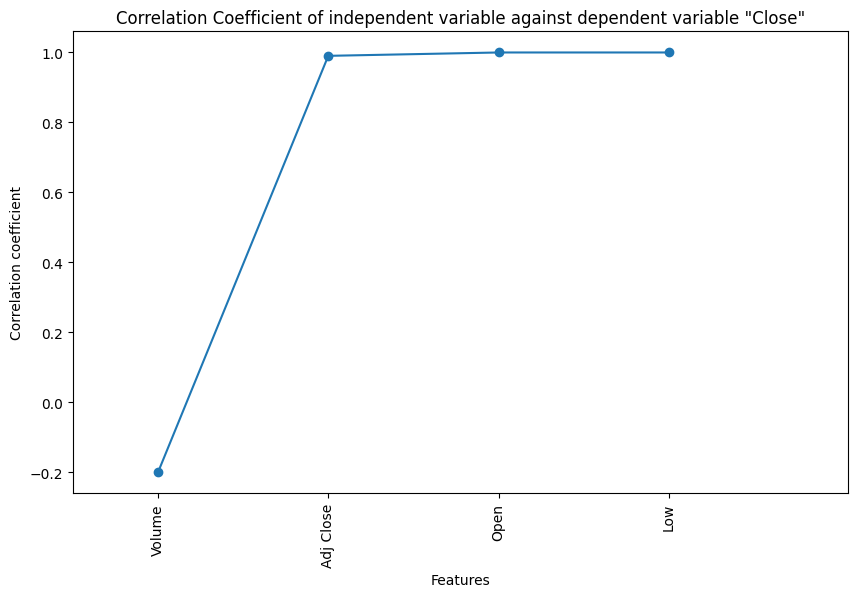

In [ ]:
_ = plt.figure(figsize=(10,6))
_ = corr.plot(style='o-')
_ = plt.xticks(ticks = range(0,len(corr)), labels = corr.index.values, rotation = 90)
_ = plt.xlim([-0.5,len(corr)+0.05])
_ = plt.ylabel('Correlation coefficient')
_ = plt.xlabel('Features')
_ = plt.title('Correlation Coefficient of independent variable against dependent variable "Close"')
#plt.savefig('fname', dpi='figure', format='png')


According to the plot, all variables—Adj Close, Open, and Low—have strong positive relationships with daily closing price, with the exception of volume (-0.2). It implies that an increase in one of these variables' unit values will result in an equal rise in the daily closing price. In contrast, if case of negative correlation, a rise in stock volume or unit price may result in a commensurate fall in daily closing prices.

In [ ]:
hypothesis_data = preprocessed_data.copy()

In [ ]:
hypothesis_data.drop(['Date', 'ticker'], axis = 1, inplace = True)

In [ ]:
hypothesis_data.head()

,Open,High,Low,Close,Adj Close,Volume
0,2167.0,2225.625,2167.0,2208.5,1154.137329,5041549.0
1,2202.0,2207.500,2174.5,2199.5,1149.433960,5184662.0
2,2192.5,2194.000,2166.5,2182.5,1140.550293,4462625.0
3,2176.5,2189.500,2161.5,2169.0,1133.494873,4815189.0
4,2156.0,2165.500,2141.0,2149.0,1123.043335,4733869.0


In [ ]:
hypothesis_data = hypothesis_data.rename(columns={"Adj Close": "AdjClose"})

In [ ]:
y = hypothesis_data['Close']
X = hypothesis_data.drop('Close', axis = 1)


y_name = 'Close'
X_name = list(X.columns)

formular = y_name + "~" + "+".join(X_name)
formular

'Close~Open+High+Low+AdjClose+Volume'

In [ ]:
OLSmodel = ols(formula = formular, data = hypothesis_data)

fitted = OLSmodel.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.730e+08
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:22:45   Log-Likelihood:            -1.1530e+06
No. Observations:              248320   AIC:                         2.306e+06
Df Residuals:                  248314   BIC:                         2.306e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1822      0.077     15.390      0.0

#Time Variation
Adding Time features to the dataset to evaluate its effect in the determination of daily closing stock price

In [ ]:
#weekday mapping
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday'}

In [ ]:
def eng_time(data):
    data['Day'] = data['Date'].dt.day
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year
    data['weekday'] = data['Date'].dt.weekday.map(weekdays)
    column_list = ['Date','Day','Month','Year','weekday'] + list(data.columns[1:-4])
    return data[column_list]

In [ ]:
processed_data_with_time = eng_time(preprocessed_data)
processed_data_with_time.head()

,Date,Day,Month,Year,weekday,Open,High,Low,Close,Adj Close,Volume,ticker
0,2013-01-02,2,1,2013,Wednesday,2167.0,2225.625,2167.0,2208.5,1154.137329,5041549.0,BHP.L
1,2013-01-03,3,1,2013,Thursday,2202.0,2207.500,2174.5,2199.5,1149.433960,5184662.0,BHP.L
2,2013-01-04,4,1,2013,Friday,2192.5,2194.000,2166.5,2182.5,1140.550293,4462625.0,BHP.L
3,2013-01-07,7,1,2013,Monday,2176.5,2189.500,2161.5,2169.0,1133.494873,4815189.0,BHP.L
4,2013-01-08,8,1,2013,Tuesday,2156.0,2165.500,2141.0,2149.0,1123.043335,4733869.0,BHP.L


In [ ]:
processed_data_with_time['weekday'] = pd.Categorical(processed_data_with_time['weekday'],
                               categories=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday'],
                               ordered= True)

In [ ]:
processed_data_with_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248320 entries, 0 to 248319
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       248320 non-null  datetime64[ns]
 1   Day        248320 non-null  int64         
 2   Month      248320 non-null  int64         
 3   Year       248320 non-null  int64         
 4   weekday    248320 non-null  category      
 5   Open       248320 non-null  float64       
 6   High       248320 non-null  float64       
 7   Low        248320 non-null  float64       
 8   Close      248320 non-null  float64       
 9   Adj Close  248320 non-null  float64       
 10  Volume     248320 non-null  float64       
 11  ticker     248320 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 21.1+ MB


In [ ]:
pd.get_dummies(processed_data_with_time.drop(['Date', 'ticker'], axis = 1), drop_first = True)

,Day,Month,Year,Open,High,Low,Close,Adj Close,Volume,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday
0,2,1,2013,2167.0,2225.625,2167.00000,2208.5,1154.137329,5041549.0,0,1,0,0
1,3,1,2013,2202.0,2207.500,2174.50000,2199.5,1149.433960,5184662.0,0,0,1,0
2,4,1,2013,2192.5,2194.000,2166.50000,2182.5,1140.550293,4462625.0,0,0,0,1
3,7,1,2013,2176.5,2189.500,2161.50000,2169.0,1133.494873,4815189.0,0,0,0,0
4,8,1,2013,2156.0,2165.500,2141.00000,2149.0,1123.043335,4733869.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248315,24,1,2023,780.5,780.500,759.50000,761.0,761.000000,198989.0,1,0,0,0
248316,25,1,2023,766.0,771.000,751.33197,755.0,755.000000,232767.0,0,1,0,0
248317,26,1,2023,762.0,769.000,759.00000,759.0,759.000000,722703.0,0,0,1,0
248318,27,1,2023,774.0,774.000,756.37500,771.0,771.000000,200493.0,0,0,0,1


<Axes: >

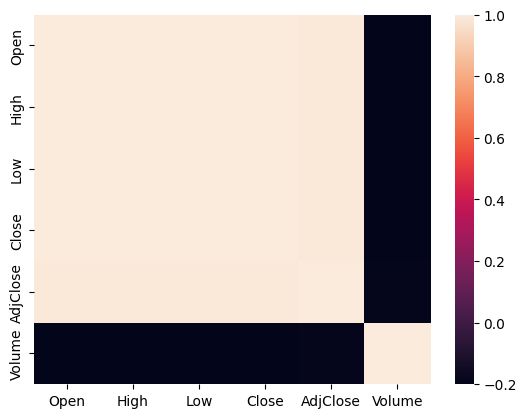

In [ ]:
sns.heatmap(hypothesis_data.corr())

<Axes: >

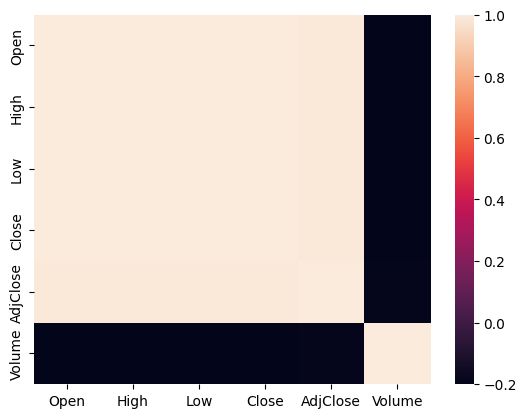

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(hypothesis_data)
data_scaled_standardise = pd.DataFrame(data_scaled, columns = hypothesis_data.columns)
sns.heatmap(data_scaled_standardise.corr())

Text(0.5, 1.0, 'Correlation Matrix')

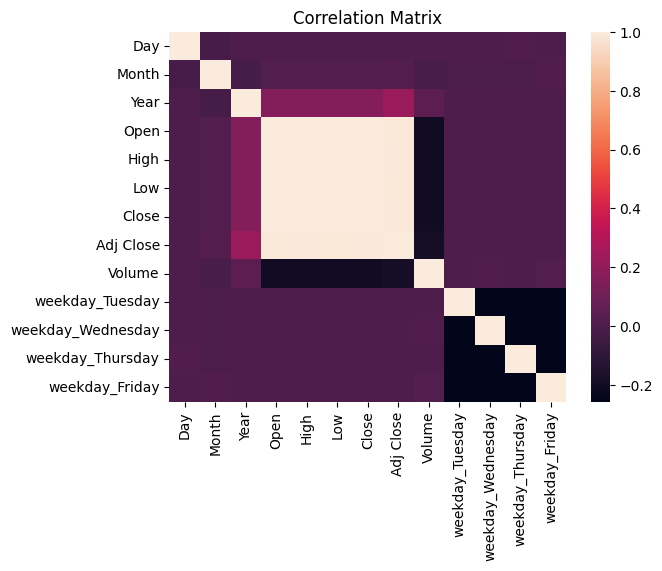

In [ ]:
sns.heatmap(pd.get_dummies(processed_data_with_time.drop(['Date', 'ticker'], axis = 1), drop_first = True).corr())
plt.title('Correlation Matrix')

In [ ]:
processed_data_with_time = processed_data_with_time.rename(columns={"Adj Close": "AdjClose"})

In [ ]:
pd.get_dummies(processed_data_with_time.drop(['Date', 'ticker', 'Open', 'High', 'Low', 'AdjClose'], axis = 1), drop_first = True).corr()

,Day,Month,Year,Close,Volume,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday
Day,1.000000,-0.017291,0.002627,0.000974,0.001326,-0.001574,0.002259,0.006338,0.002530
Month,-0.017291,1.000000,-0.024389,0.010238,-0.012040,-0.004394,-0.003077,-0.003247,0.005157
Year,0.002627,-0.024389,1.000000,0.163032,0.045145,-0.001572,0.001395,0.002010,-0.000491
Close,0.000974,0.010238,0.163032,1.000000,-0.200254,-0.000133,0.000556,0.000114,0.000187
Volume,0.001326,-0.012040,0.045145,-0.200254,1.000000,0.001291,0.003155,0.000408,0.008162
weekday_Tuesday,-0.001574,-0.004394,-0.001572,-0.000133,0.001291,1.000000,-0.256527,-0.256540,-0.252808
weekday_Wednesday,0.002259,-0.003077,0.001395,0.000556,0.003155,-0.256527,1.000000,-0.257170,-0.253429
weekday_Thursday,0.006338,-0.003247,0.002010,0.000114,0.000408,-0.256540,-0.257170,1.000000,-0.253442
weekday_Friday,0.002530,0.005157,-0.000491,0.000187,0.008162,-0.252808,-0.253429,-0.253442,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

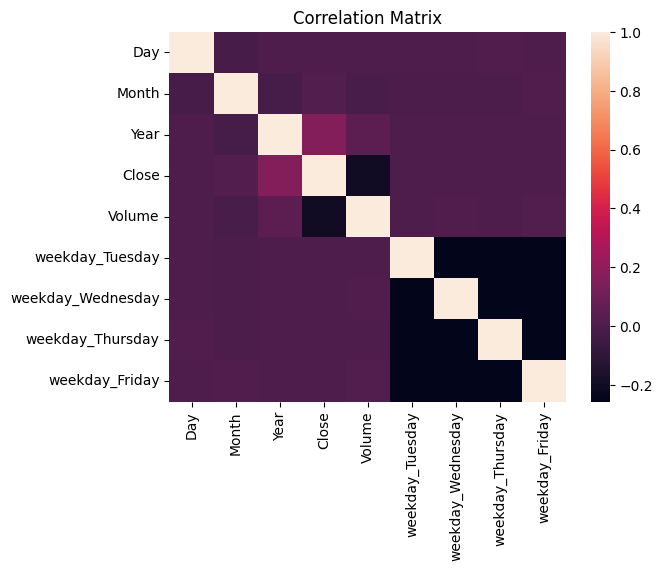

In [ ]:
sns.heatmap(pd.get_dummies(processed_data_with_time.drop(['Date', 'ticker', 'Open', 'High', 'Low', 'AdjClose'], axis = 1), drop_first = True).corr())
plt.title('Correlation Matrix')

By adding layers to the data, day, month, and year and weekdays were extracted from dates. This provided an opportunity to investigate the role of time-based factors in forecasting the closing balance for the FTSE 100 stock market. The weekday, day (0.0009), month (0.010), and year (0.163) variable exhibit a weak positive association with the closing price. It implies that an increase in the time variables' unit value will result in an equal increase in the daily closing price.

# OLS Model


In [ ]:
y_time = pd.get_dummies(processed_data_with_time.drop(['Date', 'ticker'], axis = 1), drop_first = True)['Close']
X_time = pd.get_dummies(processed_data_with_time.drop(['Date', 'ticker'], axis = 1), drop_first = True).drop('Close', axis = 1)


y_name_time = 'Close'
X_name_time = list(X_time.columns)

formular = y_name_time + "~" + "+".join(X_name_time)
formular

'Close~Day+Month+Year+Open+High+Low+AdjClose+Volume+weekday_Tuesday+weekday_Wednesday+weekday_Thursday+weekday_Friday'

In [ ]:
OLSmodel2 = ols(formula = formular, data = pd.get_dummies(processed_data_with_time.drop(['Date', 'ticker'], axis = 1), drop_first = True))

fitted2 = OLSmodel2.fit()

print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.142e+08
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:24:49   Log-Likelihood:            -1.1525e+06
No. Observations:              248320   AIC:                         2.305e+06
Df Residuals:                  248307   BIC:                         2.305e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1177.0099     40.31

The Adj. R-squared values, coefficient (coef), and p-values (P>|t|) for each variable for the purpose of interpretation. The adjusted R-squared value indicates how effectively the model explains the dependent variables, the closing price, looking at the independent variable. Based on the analysis, R-squared value was 100%. Based on the coefficient for each variable, the daily closing rate is positively impacted by the following variables: Day (0.0177), Month (0.0009), High (0.6817), Low (0.4452), Adj Close (0.0102), Wednesday (0.8266), Thursday (0.0070), and Friday (0.4219), whereas the other variables all have a negative effect. The significant level for this study was established at 5%. According to the OLS report, all variables have a considerable impact on the daily closing price, with the exception of the month (0.951), stock days that fall on Tuesday (0.371), and Thursday (0.966).

# More details on factors that affected the  FTSE 100 closing price

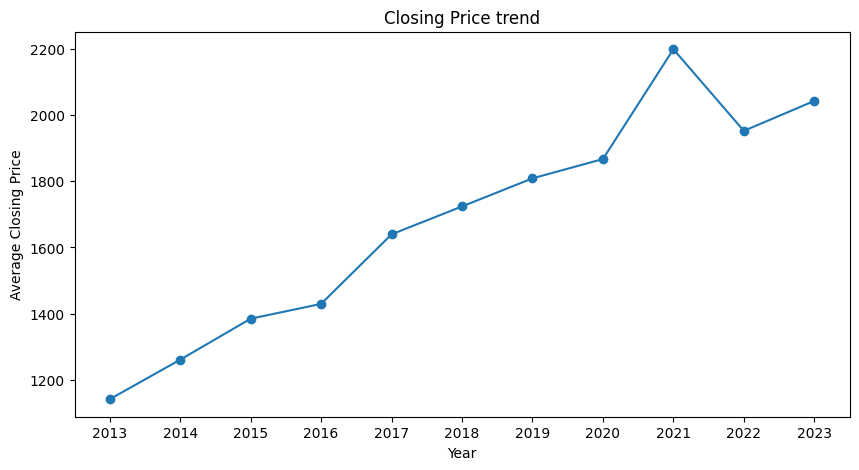

In [ ]:
processed_data_with_time.groupby('Year')['Close'].mean().plot(style='o-', figsize = (10,5))
plt.ylabel('Average Closing Price')
plt.xticks(processed_data_with_time['Year'].unique())
plt.title('Closing Price trend');

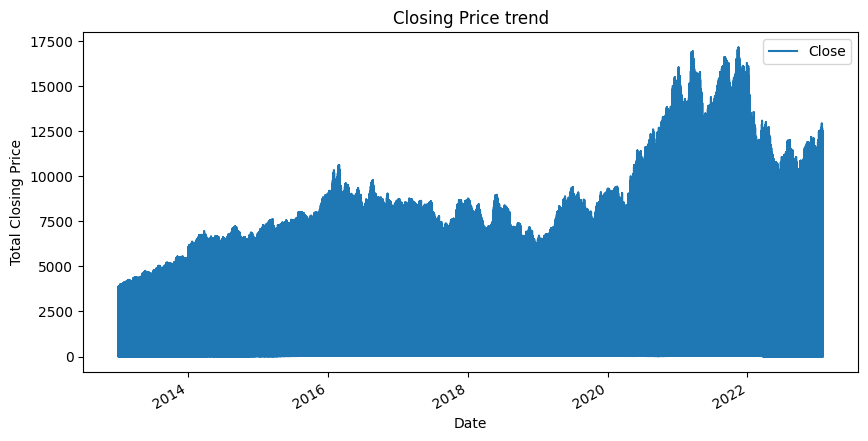

In [ ]:
processed_data_with_time.plot(x = 'Date', y = 'Close', figsize = (10,5))
plt.ylabel('Total Closing Price')
plt.title('Closing Price trend');

The visuals above shows the average closing price for the FTSE 100 index from 2013 to 2023. From 2013 through January 2023, the average closing prices for the FTSE 100 index indicate a generally rising trend with minor volatility. From 2013 through 2020, the FTSE 100 experienced a generally rising trend, which was likely driven by a mix of economic recovery from the COVID-19 pandemic, monetary policies, low-interest rates, and favourable company earnings. In 2017 and 2021, average closing prices increased significantly. However, closing prices fell dramatically in 2022. Despite the COVID-19 epidemic, the FTSE 100 stock closed with a modest boost in price compared to 2019.

In 2017, all indexes associated with the London stock exchange made strong gains. FTSE 100 index was no exception and this could be attributed to the loose monetary policy in 2017 from the Bank of England. By the close on 13 December 2017, the FTSE 100 was up 5%. 2021 for the stock index was a good year as stock prices saw a major spike. The recovery and subsequent growth in 2021 from the fatal COVID-19 pandemic could be linked to this increase. The overall GDP increased by 7.6% expansion in 2021 as the economy rebounded from the Covid-19 pandemic. The dip in 2022 could be attributed to the contraction of the UK economy. The Bank of England reported that the UK economy fell by 0.1% in the second quarter and 0.2% in the third quarter. This could be a sign of impending recession. However, there was no increase in the economy in the fourth quarter of 2022.

#Model Development

The core aim of the study was to explore various ML models that will be used to predict FTSE 100 stock market closing price. To achieve that, the Linear Regression and Random Forest Regressor ML models were deployed. For the model development, the variables were divided into x and y  before being standardised using the StandardScaler() function from the sklearn library. One purpose of standardization is to ensure all values fall within close range (Geller, 2020). Using the train_test_split() method, the whole dataset was divided into train and test sets in an 80:20 ratio. To maintain the order of the time and time-series data, shuffling was disabled in this instance.

In [ ]:
def encode_data(data):
    '''
    This function encodes the categorical variable in the data set to dummy variable
    '''
    cat_cols = [col for col in data.columns if data[col].dtype == 'O' or data[col].dtype == 'category']
    num_cols = [col for col in data.columns if data[col].dtype != 'O']

    cat_dummy = pd.get_dummies(data[cat_cols], drop_first=True)
    num_data = data[num_cols]

    data = pd.concat([cat_dummy, num_data], axis = 1)

    return data

In [ ]:
model_data = processed_data_with_time.drop(['Date', 'ticker'], axis = 1)
model_data

,Day,Month,Year,weekday,Open,High,Low,Close,AdjClose,Volume
0,2,1,2013,Wednesday,2167.0,2225.625,2167.00000,2208.5,1154.137329,5041549.0
1,3,1,2013,Thursday,2202.0,2207.500,2174.50000,2199.5,1149.433960,5184662.0
2,4,1,2013,Friday,2192.5,2194.000,2166.50000,2182.5,1140.550293,4462625.0
3,7,1,2013,Monday,2176.5,2189.500,2161.50000,2169.0,1133.494873,4815189.0
4,8,1,2013,Tuesday,2156.0,2165.500,2141.00000,2149.0,1123.043335,4733869.0
...,...,...,...,...,...,...,...,...,...,...
248315,24,1,2023,Tuesday,780.5,780.500,759.50000,761.0,761.000000,198989.0
248316,25,1,2023,Wednesday,766.0,771.000,751.33197,755.0,755.000000,232767.0
248317,26,1,2023,Thursday,762.0,769.000,759.00000,759.0,759.000000,722703.0
248318,27,1,2023,Friday,774.0,774.000,756.37500,771.0,771.000000,200493.0


In [ ]:
def prepare_model_data(data, test_size):
    copy = data.copy()
    copy = encode_data(copy)
    copy = copy.dropna()

    X = copy.drop(['weekday'], axis = 1)
    y = copy.loc[:, 'Close']


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_standardise = pd.DataFrame(X_scaled, columns = X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_standardise,
                                                    y,
                                                    test_size= test_size,
                                                    shuffle=False)
    X_train = X_train.dropna()
    y_train = y_train.dropna()
    X_test = X_test.dropna()
    y_test = y_test.dropna()

    return X_train, X_test, y_train, y_test

In [ ]:
#prepare_model_data(processed_data_with_time,0.4).isnull().sum()
#processed_data_with_time.shape

model_data.dropna().isnull().sum()
#random_Xtrain.shape

Day         0
Month       0
Year        0
weekday     0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64

In [ ]:
def train_test_model(model, X_train, X_test, y_train, y_test):

    #train model
    model.fit(X_train,y_train)

    #make predictions
    pred = model.predict(X_test)

    #calculate error rate
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,pred))


    #get classification report
    #print(classification_report(y_test,pred))
    print('The Root Mean-Squared error is: ', RMSE)

In [ ]:
#defining model
random_model = RandomForestRegressor()
linear_model = LinearRegression()

In [ ]:
random_Xtrain, random_Xtest, random_ytrain, random_ytest = prepare_model_data(model_data, 0.2)
linear_Xtrain, linear_Xtest, linear_ytrain, linear_ytest = prepare_model_data(model_data, 0.2)

In [ ]:
random_Xtrain

,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,Day,Month,Year,Open,High,Low,Close,AdjClose,Volume
0,-0.505864,1.971971,-0.507132,-0.499755,-1.571435,-1.586828,-1.590228,0.277134,0.295042,0.290903,0.299488,-0.146958,-0.123755
1,-0.505864,-0.507107,1.971874,-0.499755,-1.456502,-1.586828,-1.590228,0.295913,0.285429,0.294975,0.294658,-0.149660,-0.117968
2,-0.505864,-0.507107,-0.507132,2.000982,-1.341569,-1.586828,-1.590228,0.290816,0.278269,0.290631,0.285537,-0.154763,-0.147166
3,-0.505864,-0.507107,-0.507132,-0.499755,-0.996771,-1.586828,-1.590228,0.282231,0.275883,0.287917,0.278293,-0.158816,-0.132909
4,1.976816,-0.507107,-0.507132,-0.499755,-0.881838,-1.586828,-1.590228,0.271232,0.263154,0.276787,0.267561,-0.164819,-0.136197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198651,-0.505864,1.971971,-0.507132,-0.499755,-1.686368,1.302051,-0.208342,-0.662933,-0.662876,-0.663756,-0.663449,-0.588209,-0.174571
198652,-0.505864,-0.507107,1.971874,-0.499755,-1.571435,1.302051,-0.208342,-0.663684,-0.664998,-0.663213,-0.665380,-0.590137,-0.235901
198653,-0.505864,-0.507107,-0.507132,2.000982,-1.456502,1.302051,-0.208342,-0.664811,-0.664626,-0.663268,-0.662859,-0.587620,-0.247245
198654,-0.505864,-0.507107,-0.507132,-0.499755,-1.111703,1.302051,-0.208342,-0.662879,-0.665263,-0.662996,-0.665541,-0.590298,-0.256876


# Random Forest Regressor Model

In [ ]:
random_model = RandomForestRegressor()

random_model.fit(random_Xtrain, random_ytrain)
predictions = random_model.predict(random_Xtest)

R_squared = metrics.r2_score(random_ytest,predictions)
RMSE = np.sqrt(metrics.mean_squared_error(random_ytest,predictions))
MAE = metrics.mean_absolute_error(random_ytest,predictions)

print('The R-Squared value is: ', R_squared)
print('The Root Mean-Squared error is: ', RMSE)
print ('The Mean Absolute error rate is ', MAE)

The R-Squared value is:  0.9999999736140204
The Root Mean-Squared error is:  0.26198322202853563
The Mean Absolute error rate is  0.04243597774237431


# Linear Regression Model

In [ ]:
linear_model.fit(linear_Xtrain, linear_ytrain)
predictions_linear = linear_model.predict(linear_Xtest)

R_squared_linear = metrics.r2_score(linear_ytest,predictions_linear)
RMSE_linear = np.sqrt(metrics.mean_squared_error(linear_ytest,predictions_linear))
MAE_linear = metrics.mean_absolute_error(linear_ytest,predictions_linear)


print('The R-Squared value is: ', R_squared_linear)
print('The Root Mean-Squared error is: ', RMSE_linear)
print ('The Mean Absolute error rate is ', MAE_linear)

The R-Squared value is:  1.0
The Root Mean-Squared error is:  1.6660681704375605e-12
The Mean Absolute error rate is  1.2914125042106862e-12


A combination of R-squared, RMSE, and MAE metrics were used to evaluate the model’s performance.

According to Rosli et al., (2022), R-squared is a statistical measure that shows how much of the variance in the dependent variable (closing price) can be explained by the independent variables (high, open, and low prices, day, month, and year). The greater the R-squared value, the better the model’s performance. The RSME provides a summary of the model prediction error while the MAE calculates the average absolute difference between the expected and actual data set. (Rosli et al., 2022). The performance of the model improves when RMSE and MAE values decrease.


Looking at the linear regression model R-squared value of 100 percent, this suggest that data fits correctly and the model can correctly explain or forecast the variation in closing prices based on the independent variables provided (high, open, low prices, day, month, and year). Perfect fitting could mean overfitting, or the model may have caught noise or unpredictability in the data, which may not necessarily generalise well to fresh data. The Random Forest regressor does exceptionally well in explaining the variance in closing price, as seen by its R-squared score of 99%. The slightly lower R-squared value compared to the Linear Regression model might suggest a little improved generalisation of fresh data.

When compared to the actual observed values, the predictions provided by the Random Forest model have an average error of about 0.2927 units, based on the RMSE score. The given RMSE value for the linear regression is a very low figure, roughly 1.67 × 10-12. This shows that the linear regression model’s predictions have a relatively small average error when compared to the actual values.

The Random Forest Regressor model’s reported MAE value as 0.044. This shows that, on average, the absolute error between the Random Forest model’s predictions and the actual values is 0.044 units. However, the linear regression model’s stated MAE value is 1.29 × 10-12, which is regarded as being incredibly small. This is also consistent with the Linear Regression RMSE number. This could imply that the predictions made by the linear regression model have an even smaller average absolute error than the values themselves.


#Test for overfitting

Overfitting is a concept in machine learning that is used to describe the behaviour of a machine learning model. This occurs when the ML model is able to give good and near-accurate predictions based on the training data but when introduced to a completely new set of data, it performs poorly. To test for overfitting, the RMSE from the training data and test data was computed to compare the disparity in value. The figure below shows the Training RMSE and Test RMSE for both models employed.

In [ ]:
def test_model(model, x, y):
    # your code here
    y_pred = model.predict(x)
    rmse = np.sqrt(metrics.mean_squared_error(y_pred, y))
    return rmse

In [ ]:
linear_train = test_model(linear_model, linear_Xtrain, linear_ytrain)
linear_test = test_model(linear_model, linear_Xtest, linear_ytest)

print(linear_train)
print(linear_test)

1.1818946683884661e-12
1.1932817010418519e-12


In [ ]:
random_train = test_model(random_model, random_Xtrain, random_ytrain)
random_test = test_model(random_model, random_Xtest, random_ytest)

print(random_train)
print(random_test)

0.3025438701976084
0.27472273027170097


In [ ]:
performance_dict = {

                      'Train RMSE':

                        {"Model 1_Linear": linear_train,
                        "Model 2_Random" : random_train
                    },

                        'Test RMSE': {
                            'Model 1_Linear': linear_test,
                            'Model 2_Random' : random_test
                        }
}

model_performance = pd.DataFrame(performance_dict)
model_performance

,Train RMSE,Test RMSE
Model 1_Linear,1.181895e-12,1.193282e-12
Model 2_Random,3.025439e-01,2.747227e-01


<Figure size 2400x1200 with 0 Axes>

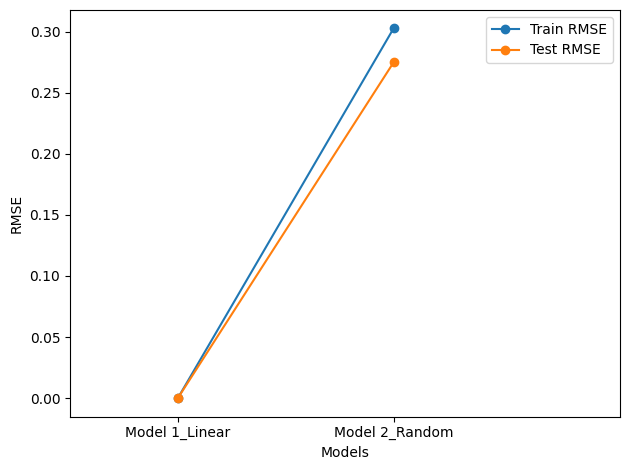

In [ ]:
_ = plt.figure(figsize=(24,12))
_ = model_performance.plot(style='o-')
_ = plt.xticks(ticks = range(0,len(model_performance)), labels = model_performance.index.values)
_ = plt.xlim([-0.5,len(model_performance)+0.05])
_ = plt.ylabel('RMSE')
_ = plt.xlabel('Models')
_ = plt.tight_layout()

The RMSE score for the train and test set using the linear Regression model was at the 1.18 × 10 -12 and 1.19 × 10 -12 respectively while the RMSE score for the train and test set using the Random Forest Model was at 0.30 and 0.27 respectively. Compared to the performance on the test set, the Random Forest Model performed better with a reduced test score by 10%. However, the Linear Regression model performed the best as the error rate is significantly near zero.

# Conclusion
The Linear Regression outperformed the Random Forest regressor in terms of accuracy and evaluation metrics. Both models are able to anticipate stock market developments with a high degree of accuracy. As compared to the Linear Regression model, the Random Forest model has a little greater RMSE and MAE, but both values are still very modest, indicating strong prediction accuracy.
The linear regression model’s incredibly low RMSE and MAE values raise concerns about its accuracy and possible overfitting. Such minute errors are unusual, and they might be a sign that the model might not generalise effectively to brand-new, untested data. Therefore, additional research may be necessary to guarantee that the model’s performance is not impacted by numerical accuracy or other issues. For future studies, combining both models should be considered because even if the R-squared score for linear regression was high, the Random Forest model may offer a more reliable generalisation.


# Recommendations
Based on the discussed project findings and results, the following action points are recommended for investors and stakeholders interested in utilizing predictive models to understand and predict FTSE 100 stock prices based on the project’s findings:

1. **Consider Important Elements**: According to the data, the FTSE 100 index’s
closing price is significantly influenced by the opening price, high price, low price, adjusted closed price, and trading volume. When analysing future price changes, investors should pay special attention to these factors.

2. **Recognise Weekly Patterns**: It has been demonstrated that specific days of the week, particularly Wednesdays and Fridays, have a considerable impact on the daily closing price. When making trading selections, investors might want to take into account these weekly patterns.

3. **Risk management**: Although predictive models offer insightful information, it’s important to keep in mind that stock market investment has certain dangers. Although they should be utilised as a part of a larger investing plan that also involves risk management and diversification, predictive models can be helpful in decision-making.
